In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [11]:
df = pd.read_csv("../data/adult.csv")
df = df.replace("?", np.nan)
df = df.dropna()
check_salary_salaryK_less_or_equal_to_50 = df[(df["salary"] != "<=50K") & (df["salary K$"] <= 50)]
if len(check_salary_salaryK_less_or_equal_to_50) > 0:
    print("Exists incorrect data for salary less than or equal 50K")
    display(check_salary_salaryK_less_or_equal_to_50)
check_salary_salaryK_more_50 = df[(df["salary"] != ">50K") & (df["salary K$"] > 50)]
if len(check_salary_salaryK_more_50) > 0:
    print("Exists incorrect data for salary more than 50K")
    display(check_salary_salaryK_more_50)
another_data = df[(df["salary"] != "<=50K") & (df["salary"] != ">50K")]
if len(another_data) > 0:
    print("Exists incorrect data for column salary")
    display(another_data)
salaryK_less_1 = df[(df["salary K$"] < 1)]
if len(salaryK_less_1) > 0:
    print("Exists incorrect data for column salary K$")
df.tail(10)

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
32551,32551,32,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K,35
32552,32552,43,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,45,United-States,<=50K,39
32553,32553,32,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K,36
32554,32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,103
32555,32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K,32
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38
32560,32560,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K,243


# Task 1
Print the count of men and women in the dataset.

In [44]:
men = df[df["sex"] == "Male"].shape[0]
women = df[df["sex"] == "Female"].shape[0]
total = df.shape[0]
display(men, women, men + women, total)

20380

9782

30162

30162

# Task 2
Find the average age of men in dataset

In [56]:
men = df[df["sex"] == "Male"]["age"].mean()
men

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [62]:
total_count = len(df)
polish = len(df[df["native-country"] == "Poland"])
per_polish = polish / total_count * 100
print(f"The percentage of people from Poland: {per_polish:.2f}")

The percentage of people from Poland: 0.19


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [67]:
mean_age_earn_more_50K = df[df["salary"] == ">50K"]["age"].mean()
std_age_earn_more_50K = df[df["salary"] == ">50K"]["age"].std()
print(f"The mean of the age for people who earn > 50K per year: {mean_age_earn_more_50K:.4f}")
print(f"The standard deviation of the age for people who earn > 50K per year: {std_age_earn_more_50K:.4f}")

mean_age_earn_less_or_equal_50K = df[df["salary"] == "<=50K"]["age"].mean()
std_age_earn_less_or_equal_50K = df[df["salary"] == "<=50K"]["age"].std()
print(f"The mean of the age for people who earn <= 50K per year: {mean_age_earn_less_or_equal_50K:.4f}")
print(f"The standard deviation of the age for people who earn <= 50K per year: {std_age_earn_less_or_equal_50K:.4f}")

The mean of the age for people who earn > 50K per year: 43.9591
The standard deviation of the age for people who earn > 50K per year: 10.2696
The mean of the age for people who earn <= 50K per year: 36.6081
The standard deviation of the age for people who earn <= 50K per year: 13.4646


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [80]:
count = len(df[(~df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])) & (df["salary"] == ">50K")])
print(f"There are people without higher education but with > 50K salary: {count > 0}. Quantity: {count}")

There are people without higher education but with > 50K salary: True. Quantity: 3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [98]:
df.groupby("education").describe()

Unnamed: 0                                                      \
                  count          mean          std    min      25%      50%   
education                                                                     
10th              820.0  16099.841463  9323.630350  219.0  7860.75  16110.5   
11th             1048.0  16230.614504  9435.727749    3.0  7773.25  16491.5   
12th              377.0  17524.734748  9160.712573  415.0  9895.00  18630.0   
1st-4th           151.0  17502.503311  9788.829534  416.0  9009.00  17445.0   
5th-6th           288.0  16845.131944  9273.562959   56.0  9557.75  17173.0   
7th-8th           557.0  16283.675045  9328.136399   15.0  8014.00  16464.0   
9th               455.0  16306.367033  9438.104861    6.0  7638.50  16734.0   
Assoc-acdm       1008.0  16667.503968  9503.534369   13.0  8176.00  16897.5   
Assoc-voc        1307.0  16520.351186  9429.290747   48.0  8453.50  16722.0   
Bachelors        5044.0  16187.880452  9355.163922    0.0  8265.75  16108.0   
Doctorate         375.0  16600.130667  9141.070844   20.0  9067.50  16573.0   
HS-grad          9840.0  16166.445935  9338.758443    2.0  8173.75  16058.5   
Masters          1627.0  16341.271051  9497.768306    5.0  8094.00  16134.0   
Preschool          45.0  18268.377778  9824.639913  224.0  8775.00  21388.0   
Prof-school       542.0  16724.850554  9575.872379   52.0  8325.50  17072.0   
Some-college     6678.0  16266.526804  9414.721651   10.0  7986.25  16238.5   

                                    age             ... hours-per-week        \
                   75%      max   count       mean  ...            75%   max   
education                                           ...                        
10th          24230.75  32551.0   820.0  37.897561  ...           40.0  99.0   
11th          24275.25  32522.0  1048.0  32.363550  ...           40.0  99.0   
12th          25040.00  32535.0   377.0  32.013263  ...           40.0  99.0   
1st-4th       27132.50  32425.0   151.0  44.622517  ...           40.0  96.0   
5th-6th       25550.25  32334.0   288.0  41.649306  ...           40.0  75.0   
7th-8th       24473.00  32517.0   557.0  47.631957  ...           40.0  99.0   
9th           24516.00  32501.0   455.0  40.303297  ...           40.0  99.0   
Assoc-acdm    24918.25  32556.0  1008.0  37.286706  ...           45.0  99.0   
Assoc-voc     24410.50  32552.0  1307.0  38.246366  ...           45.0  99.0   
Bachelors     24284.75  32538.0  5044.0  38.641554  ...           50.0  99.0   
Doctorate     24299.00  32532.0   375.0  47.130667  ...           55.0  99.0   
HS-grad       24203.00  32560.0  9840.0  38.640955  ...           44.0  99.0   
Masters       24705.00  32554.0  1627.0  43.740012  ...           50.0  99.0   
Preschool     25652.00  32432.0    45.0  41.288889  ...           40.0  75.0   
Prof-school   25123.25  32548.0   542.0  44.249077  ...           55.0  99.0   
Some-college  24486.75  32555.0  6678.0  36.135370  ...           45.0  99.0   

             salary K$                                                     \
                 count        mean         std   min   25%    50%     75%   
education                                                                   
10th             820.0   43.912195   47.890388  15.0  25.0   33.0   43.00   
11th            1048.0   41.527672   46.846283  15.0  24.0   32.0   42.00   
12th             377.0   42.761273   47.213033  15.0  24.0   33.0   43.00   
1st-4th          151.0   37.556291   34.351446  15.0  24.0   31.0   41.50   
5th-6th          288.0   39.857639   42.081933  15.0  23.0   33.0   43.00   
7th-8th          557.0   42.095153   47.388376  15.0  24.0   32.0   42.00   
9th              455.0   43.028571   50.022784  15.0  24.5   33.0   42.00   
Assoc-acdm      1008.0   75.566468   87.291460  15.0  26.0   38.0   61.25   
Assoc-voc       1307.0   76.102525   86.446091  15.0  27.0   39.0   64.00   
Bachelors       5044.0  102.832276  101.376121  15.0  29.0   44.0 

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [113]:
count_non_married_with_earn_more_50 = len(df[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married")) & (df["salary"] == ">50K")])
total_men_with_earn_more_50 = len(df[(df["sex"] == "Male") & (df["salary"] == ">50K")])
count_married_more_50 = len(df[(df["sex"] == "Male") & (df["salary"] == ">50K")]) - count_non_married_with_earn_more_50
print(f"Quantity of non-married men with salary >50K: {count_non_married_with_earn_more_50} "
      f"from total men with salary >50K: {total_men_with_earn_more_50}" )
print(f"Quantity of married men with salary >50K: {count_married_more_50} "
      f"from total men with salary >50K: {total_men_with_earn_more_50}")
count_non_married_with_earn_equal_or_less_50 =(
    len(df[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married")) & (df["salary"] == "<=50K")]))
total_men_with_earn_more_50 = len(df[(df["sex"] == "Male") & (df["salary"] == "<=50K")])
count_married_equal_or_less_50 = total_men_with_earn_more_50 - count_non_married_with_earn_equal_or_less_50
print(f"Quantity of non-married men with salary <=50K: {count_non_married_with_earn_equal_or_less_50}, "
      f"from total men with salary <=50K: {total_men_with_earn_more_50}")
print(f"Quantity of married men with salary <=50K: {count_married_equal_or_less_50} "
      f"from total men with salary <=50K: {total_men_with_earn_more_50}")

Quantity of non-married men with salary >50K: 673 from total men with salary >50K: 6396
Quantity of married men with salary >50K: 5723 from total men with salary >50K: 6396
Quantity of non-married men with salary <=50K: 6932, from total men with salary <=50K: 13984
Quantity of married men with salary <=50K: 7052 from total men with salary <=50K: 13984


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [134]:
max_hours = df["hours-per-week"].max()
len(df[df["hours-per-week"] == max_hours])

np.int64(90)

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Carrelations for data in digits:
                Unnamed: 0       age  hours-per-week  salary K$
Unnamed: 0        1.000000 -0.001126       -0.001890   0.000129
age              -0.001126  1.000000        0.101599   0.208203
hours-per-week   -0.001890  0.101599        1.000000   0.196378
salary K$         0.000129  0.208203        0.196378   1.000000


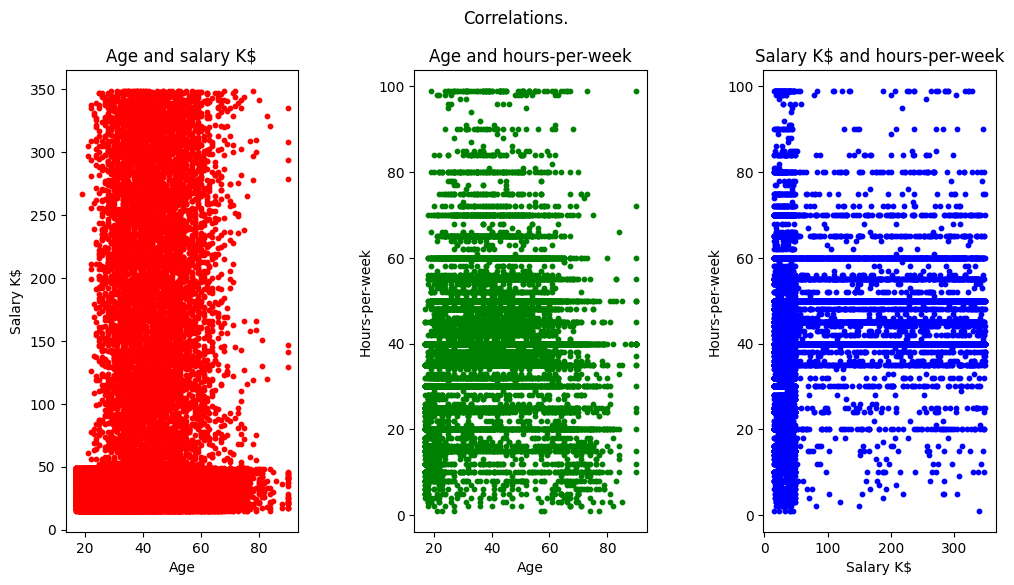

<Figure size 1000x600 with 0 Axes>

In [25]:
print(f"Correlations for data in digits:\n{df.corr(numeric_only=True)}")
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
plt.figure(figsize=(10, 6))
fig1.suptitle("Correlations.")
ax1.set_title("Age and salary K$")
ax1.set(xlabel="Age", ylabel="Salary K$")
ax2.set_title("Age and hours-per-week")
ax2.set(xlabel="Age", ylabel="Hours-per-week")
ax3.set_title("Salary K$ and hours-per-week")
ax3.set(xlabel="Salary K$", ylabel="Hours-per-week")
fig1.subplots_adjust(wspace=0.5)
ax1.scatter(df["age"], df["salary K$"], s=10, color="red")
ax2.scatter(df["age"], df["hours-per-week"], s=10, color="green")
ax3.scatter(df["salary K$"], df["hours-per-week"], s=10, color="blue")

plt.show()